# Detailed subgroups

We will now at two classes of metabolites in more detail. Namely, bile acids and sphingolipids. We will again perform the analyses in the discovery cohort, the validation cohort and the external cohort. 

## Discovery cohort

We will use our previous data and go right ahead in plotting the results.

In [1]:
import pandas as pd
from plotnine import *
from mizani.formatters import percent_format
from utils import summarize_associations, rsid2gene

sig_microbes = pd.read_csv("data/sig_metabolite_taxon.csv")
sig_snps = pd.read_csv("data/final_results.csv")
sig_snps["rsid"] = sig_snps.SNP.str.split(";").str[0]
# sig_snps = sig_snps[sig_snps.SP2 != "NONE"]
genes = rsid2gene(sig_snps.rsid.unique())
sig_snps = sig_snps.merge(genes, left_on="rsid", right_on="snp", how="left")
train_joint_r_sq = pd.read_csv("data/train_joint_r_sq.csv")
train_joint_r_sq["BIOCHEMICAL_NAME"] = pd.Categorical(train_joint_r_sq.BIOCHEMICAL_NAME, train_joint_r_sq.BIOCHEMICAL_NAME.unique())

We start by looking at the bile acids.

/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3 x 3.5 in image.
/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/train_secondary_bas_r2.pdf
/proj/gibbons/gene_environment_interaction/gxe/utils.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

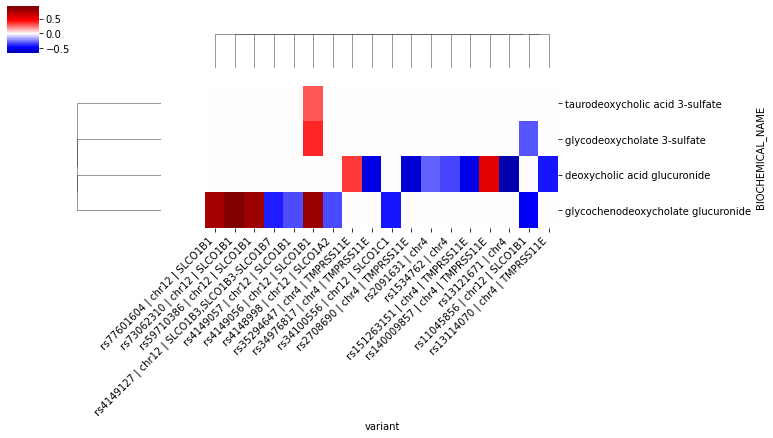

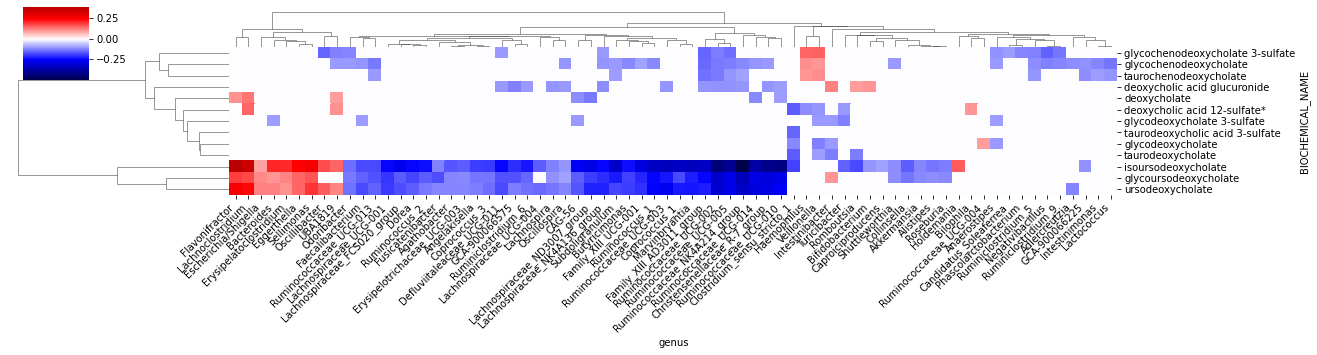

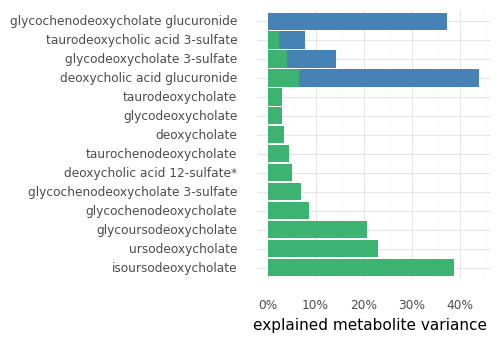

(<ggplot: (8738134417845)>,
 <seaborn.matrix.ClusterGrid at 0x7f28162fa4c0>)

In [2]:
deoxy = train_joint_r_sq[train_joint_r_sq.BIOCHEMICAL_NAME.str.contains("deoxychol", regex=True)]
summarize_associations("train_secondary_bas", deoxy, sig_snps, sig_microbes)

And we run the same thing for sphingolipids.

/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3 x 4.0 in image.
/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/train_sphingolipids_r2.pdf
/proj/gibbons/gene_environment_interaction/gxe/utils.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

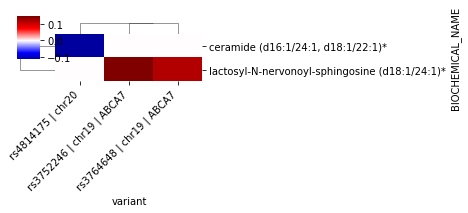

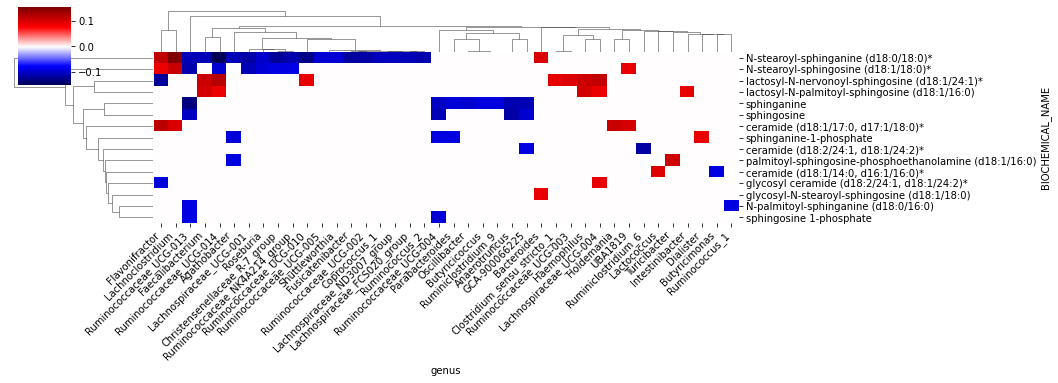

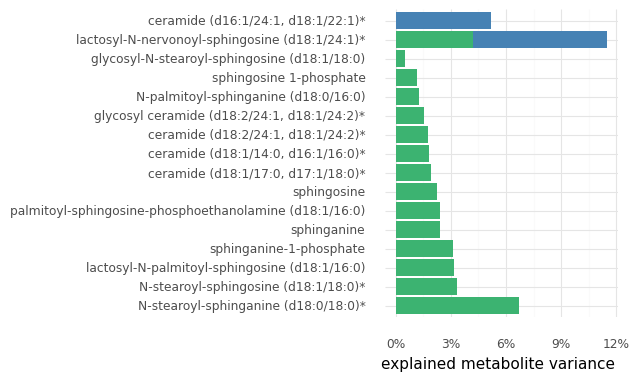

(<ggplot: (8738134075917)>,
 <seaborn.matrix.ClusterGrid at 0x7f2816004c70>)

In [3]:
sphingo = train_joint_r_sq[train_joint_r_sq.BIOCHEMICAL_NAME.str.contains("sphingosine|ceram|sphinganine", regex=True)]
summarize_associations("train_sphingolipids", sphingo, sig_snps, sig_microbes)

## In the validation cohort

And we so the same for the validation cohort.

In [4]:
valid_joint_r_sq = pd.read_csv("data/valid_joint_r_sq.csv")
valid_joint_r_sq["BIOCHEMICAL_NAME"] = pd.Categorical(valid_joint_r_sq.BIOCHEMICAL_NAME, valid_joint_r_sq.BIOCHEMICAL_NAME.unique())

/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3 x 3.5 in image.
/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/valid_secondary_bas_r2.pdf


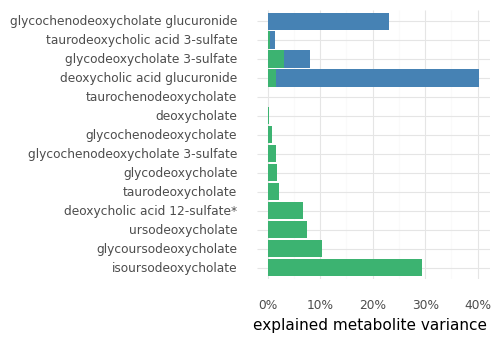

<ggplot: (8738134975726)>

In [5]:
deoxy = valid_joint_r_sq[valid_joint_r_sq.BIOCHEMICAL_NAME.str.contains("deoxychol", regex=True)]
summarize_associations("valid_secondary_bas", deoxy, sig_snps, sig_microbes, only_r2=True)

/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3 x 3.75 in image.
/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/valid_sphingolipids_r2.pdf


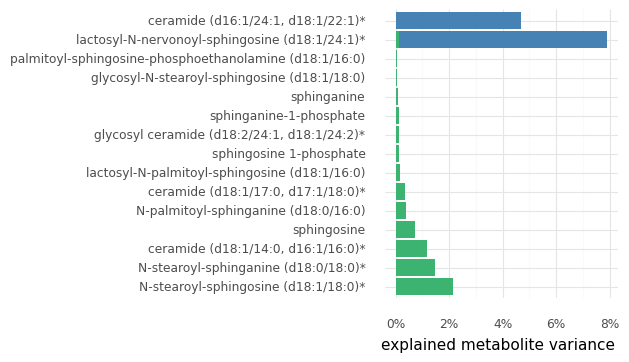

<ggplot: (8738134151394)>

In [6]:
sphingo = valid_joint_r_sq[valid_joint_r_sq.BIOCHEMICAL_NAME.str.contains("sphingosine|ceram|sphinganine", regex=True)]
summarize_associations("valid_sphingolipids", sphingo, sig_snps, sig_microbes, only_r2=True)

## External cohort

And repeating it in the cohort from Bar et. al.

In [7]:
external_r_sq = pd.read_excel("data/41586_2020_2896_MOESM3_ESM.xlsx", "Supplementary Table 6")
meta = pd.read_excel("data/41586_2020_2896_MOESM3_ESM.xlsx", "Supplementary Table 1")

external_r_sq["CHEMICAL_ID"] = external_r_sq["Grouped Metabolites"].astype(str).str.split("+").str[0]
meta.CHEMICAL_ID = meta.CHEMICAL_ID.astype(str)
external_r_sq = pd.merge(external_r_sq, meta, on="CHEMICAL_ID")
external_r_sq = external_r_sq[(external_r_sq["Genetics p-value"] < 0.05) | (external_r_sq["Microbiome p-value"] < 0.05)]
external_r_sq["metabolite"] = "metabolite_" + external_r_sq.CHEMICAL_ID

external_r_sq["micro_r2"] = external_r_sq["Microbiome R2"].apply(lambda x: x if x>0 else 0)
external_r_sq["geno_r2"] = external_r_sq["Genetics R2"].apply(lambda x: x if x>0 else 0)
external_r_sq["total"] = external_r_sq["micro_r2"] + external_r_sq["geno_r2"]

external_r_sq["group"] = "hybrid"
external_r_sq.loc[(external_r_sq["micro_r2"] <= 0.01 * external_r_sq["total"]), "group"] = "genetics"
external_r_sq.loc[(external_r_sq["geno_r2"] <= 0.01 * external_r_sq["total"]), "group"] = "microbiome"
external_r_sq.sort_values(by="total", ascending=True, inplace=True)
external_r_sq["BIOCHEMICAL_NAME"] = pd.Categorical(external_r_sq.BIOCHEMICAL, external_r_sq.BIOCHEMICAL.unique())
external_r_sq.sort_values(by="total", ascending=False, inplace=True)
external_r_sq.to_csv("external_r_squared.csv", index=False)
external_r_sq = external_r_sq[~external_r_sq.BIOCHEMICAL.str.startswith("X -")]

/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3 x 2.75 in image.
/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/external_secondary_bas_r2.pdf


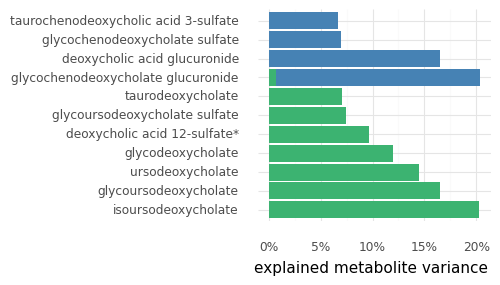

<ggplot: (8738134122972)>

In [8]:
deoxy = external_r_sq[external_r_sq.BIOCHEMICAL_NAME.str.contains("deoxychol", regex=True)]
summarize_associations("external_secondary_bas", deoxy, sig_snps, sig_microbes, only_r2=True)

/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3 x 1.0 in image.
/users/cdiener/miniconda3/envs/gxe2021/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/valid_sphingolipids_r2.pdf


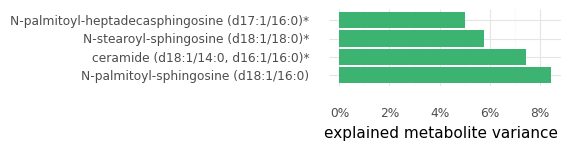

<ggplot: (8738123664038)>

In [9]:
sphingo = external_r_sq[external_r_sq.BIOCHEMICAL_NAME.str.contains("sphingosine|ceram|sphinganine", regex=True)]
summarize_associations("valid_sphingolipids", sphingo, sig_snps, sig_microbes, only_r2=True)